In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option("display.max_columns", None)

In [189]:
data = pd.read_csv('../data/processed/cleaned_break_data.csv')
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,HOUR_IMPACTED,UNITS_IMPACTED,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,GLOBALID
1765,-80.516126,43.444185,9862,2270,2017-05-26 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,1230,KARN ST,20860,150.0,1968.0,DI,Y,40279eda-bc71-4691-b1d1-f00ef4242240
2515,-80.438455,43.449983,49603,144998,2022-01-30 16:09:24+00:00,MAIN,4-8 hours,0-50,REPAIR COMPLETED,CORROSION AND LONGITUDINAL,UNKNOWN,Y,Y,Y,Y,Y,Y,CATEGORY 2,11500,OLD CHICOPEE DR,28280,200.0,1967.0,DI,Y,28219f3f-c965-4c19-86cb-71a6dd8acaf4
1939,-80.461889,43.428449,10043,1165,2007-12-01 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,AGE,Y,Y,Y,Y,Y,Y,CATEGORY 1,13311,MASSEY AVE,25590,150.0,1958.0,CI,Y,f263431b-1545-470c-a597-f1ec48ae593d
2053,-80.469451,43.449974,10164,219,2004-01-23 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,9840,LIBERTY AVE,77126,150.0,2012.0,PVCO,N,40d4b425-a62f-45c2-88e2-7ff7f62a0560
1093,-80.451352,43.449537,9153,2201,2016-02-29 00:00:00+00:00,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,10210,YULE PL,44440,100.0,1961.0,DI,Y,e428fe44-a6d1-46c6-be2c-02f016bc4d10


In [190]:
data.shape

(2585, 26)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LONGITUDE                    2585 non-null   float64
 1   LATITUDE                     2585 non-null   float64
 2   OBJECTID                     2585 non-null   int64  
 3   WATBREAKINCIDENTID           2585 non-null   int64  
 4   INCIDENT_DATE                2585 non-null   object 
 5   BREAK_TYPE                   2585 non-null   object 
 6   HOUR_IMPACTED                2585 non-null   object 
 7   UNITS_IMPACTED               2585 non-null   object 
 8   STATUS                       2585 non-null   object 
 9   BREAK_NATURE                 2585 non-null   object 
 10  BREAK_APPARENT_CAUSE         2585 non-null   object 
 11  POSITIVE_PRESSURE_MAINTANED  2585 non-null   object 
 12  AIR_GAP_MAINTANED            2585 non-null   object 
 13  MECHANICAL_REMOVAL

In [192]:
from datetime import datetime, date
data['INCIDENT_DATE'] = pd.to_datetime(data['INCIDENT_DATE']).dt.date

In [193]:
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,HOUR_IMPACTED,UNITS_IMPACTED,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,GLOBALID
693,-80.453253,43.422950,8728,2338,2018-01-22,MAIN,8-12 hours,0,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,21840,WOODHAVEN RD,43910,150.0,1954.0,CI,Y,a1c64b92-3f38-4597-89bb-19959cffad53
1822,-80.529807,43.449459,9921,1056,2007-01-17,MAIN,8-12 hours,0,REPAIR COMPLETED,CIRCUMFERENTIAL,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,20769,INVERNESS DR,64130,150.0,1966.0,CI,Y,55c376b5-df4b-47f1-8f42-6f2aae7f5d8f
2584,-80.524112,43.417845,63682,147634,2022-10-28,MAIN,20-24 hours,0-50,REPAIR COMPLETED,UNKNOWN,UNKNOWN,Y,Y,Y,Y,Y,Y,UNKNOWN,5437,FORESTWOOD DR,15000,150.0,1969.0,DI,Y,80f27462-48d7-4a18-862a-a7f3c4352bb1
2024,-80.532660,43.446442,10134,1473,2010-03-22,MAIN,8-12 hours,0,REPAIR COMPLETED,FITTING/JOINT,AGE,Y,Y,Y,Y,Y,Y,CATEGORY 1,20775,GLASGOW ST,96944,200.0,2014.0,PVCO,N,e3555655-f915-48d2-a070-1e7d62546eac
1162,-80.452899,43.429142,9223,1585,2011-01-22,MAIN,8-12 hours,0,REPAIR COMPLETED,CIRCUMFERENTIAL,AGE,Y,Y,Y,Y,Y,Y,CATEGORY 1,9987,SIXTH AVE,35140,150.0,1953.0,CI,Y,f7e8c5d2-03e9-4e01-9664-c8fc79959c9d


Possible columns to drop still:
- Global ID
- Units Impacted
- Hours Impacted
- possibly more after further analysis...


In [194]:
data['HOUR_IMPACTED'].value_counts()

8-12 hours     2354
4-8 hours       210
20-24 hours      11
16-20 hours       6
12-16 hours       4
Name: HOUR_IMPACTED, dtype: int64

In [195]:
data['UNITS_IMPACTED'].value_counts()

0            2318
0-50          256
50-100          5
100-150         3
200-10000       2
47              1
Name: UNITS_IMPACTED, dtype: int64

Can't really see these variables being too valuable for any sort of model so we can go ahead and remove them along with Global ID

In [196]:
data.drop(['GLOBALID', 'HOUR_IMPACTED', 'UNITS_IMPACTED'], axis=1, inplace=True)

In [197]:
data.isna().sum() # just double checking even though we already cleaned the data in our other notebook

LONGITUDE                      0
LATITUDE                       0
OBJECTID                       0
WATBREAKINCIDENTID             0
INCIDENT_DATE                  0
BREAK_TYPE                     0
STATUS                         0
BREAK_NATURE                   0
BREAK_APPARENT_CAUSE           0
POSITIVE_PRESSURE_MAINTANED    0
AIR_GAP_MAINTANED              0
MECHANICAL_REMOVAL             0
FLUSHING_EXCAVATION            0
HIGHER_VELOCITY_FLUSHING       0
ANODE_INSTALLED                0
BREAK_CATEGORIZATION           0
ROADSEGMENTID                  0
STREET                         0
ASSETID                        0
ASSET_SIZE                     0
ASSET_YEAR_INSTALLED           0
ASSET_MATERIAL                 0
ASSET_EXISTS                   0
dtype: int64

In [198]:
data['ASSET_MATERIAL'].value_counts()

CI      1580
DI       563
PVC      321
PVCO      60
CPP       19
XXX       18
HDPE      11
AC         8
PVCB       2
COP        2
PE         1
Name: ASSET_MATERIAL, dtype: int64

In [199]:
data['ASSETID'].nunique()

1315

In [200]:
num_break = {}

for pipe in data['ASSETID']:
    if pipe in num_break:
        num_break[pipe] += 1
    else:
        num_break[pipe] = 1

In [201]:
data['NUM_BREAKS'] = data['ASSETID'].map(num_break)

In [202]:
data.tail()

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,NUM_BREAKS
2580,-80.450009,43.441900,63042,147234,2022-10-04,MAIN,REPAIR COMPLETED,CIRCUMFERENTIAL,UNKNOWN,Y,Y,Y,Y,Y,Y,CATEGORY 1,13222,ROSS AVE,33550,150.0,1959.0,CI,Y,12
2581,-80.464945,43.464141,63043,147236,2022-10-04,MAIN,REPAIR COMPLETED,UNKNOWN,UNKNOWN,Y,Y,Y,Y,Y,Y,CATEGORY 1,12662,VICTORIA ST N,80840,200.0,1953.0,CI,Y,1
2582,-80.440943,43.454616,63361,147314,2022-10-16,MAIN,REPAIR COMPLETED,CIRCUMFERENTIAL,UNKNOWN,Y,Y,Y,Y,Y,Y,CATEGORY 1,23223,MONTCALM DR,26980,200.0,1966.0,DI,Y,2
2583,-80.440943,43.454616,63681,147334,2022-10-17,MAIN,CANCELLED,CIRCUMFERENTIAL,UNKNOWN,Y,Y,Y,Y,Y,Y,CATEGORY 1,23223,MONTCALM DR,26980,200.0,1966.0,DI,Y,2
2584,-80.524112,43.417845,63682,147634,2022-10-28,MAIN,REPAIR COMPLETED,UNKNOWN,UNKNOWN,Y,Y,Y,Y,Y,Y,UNKNOWN,5437,FORESTWOOD DR,15000,150.0,1969.0,DI,Y,4


In [203]:
data.shape

(2585, 24)

In [204]:
data.NUM_BREAKS.sum()

8425

In [205]:
data['ASSET_YEAR_INSTALLED'] = pd.to_datetime(data['ASSET_YEAR_INSTALLED'], format='%Y')

In [206]:
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,NUM_BREAKS
1303,-80.529043,43.451524,9374,373,2000-02-09,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,20773,ABERDEEN RD,260,150.0,1955-01-01,CI,N,4
2522,-80.445147,43.442670,50881,145294,2022-02-09,MAIN,REPAIR COMPLETED,UNKNOWN,UNKNOWN,Y,Y,Y,Y,Y,Y,UNKNOWN,13190,RENNIE DR,32160,150.0,1963-01-01,CI,Y,6
343,-80.493453,43.426419,8348,1811,2013-11-15,MAIN,REPAIR COMPLETED,CIRCUMFERENTIAL,COMBINATION,Y,Y,Y,Y,Y,Y,CATEGORY 1,6581,AVALON PL,1250,300.0,1955-01-01,CI,Y,1
977,-80.438327,43.398803,9034,1138,2007-06-20,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,21874,FARRIER PL,14130,150.0,1974-01-01,DI,Y,1
1749,-80.519120,43.448710,9846,2254,2017-02-13,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,1246,DUNBAR RD,10690,150.0,1955-01-01,CI,Y,2


In [207]:
data['ASSET_YEAR_INSTALLED'].min()

Timestamp('1889-01-01 00:00:00')

In [208]:
data['ASSET_YEAR_INSTALLED'].max()

Timestamp('2018-01-01 00:00:00')

In [209]:
data['INCIDENT_DATE'].min()

datetime.date(1985, 1, 1)

In [210]:
data['AGE'] = (np.floor((pd.to_datetime(data['INCIDENT_DATE']) - 
                        pd.to_datetime(data['ASSET_YEAR_INSTALLED'])).dt.days / 365.25)).astype(int)

# the following code is something I found on stack overflow that
# helped me calculate the age in years of each pipe

# df['age'] = (np.floor((pd.to_datetime(df['dte']) - 
#              pd.to_datetime(dob)).dt.days / 365.25)).astype(int)

In [211]:
data.sample(5)

,LONGITUDE,LATITUDE,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,STATUS,BREAK_NATURE,BREAK_APPARENT_CAUSE,POSITIVE_PRESSURE_MAINTANED,AIR_GAP_MAINTANED,MECHANICAL_REMOVAL,FLUSHING_EXCAVATION,HIGHER_VELOCITY_FLUSHING,ANODE_INSTALLED,BREAK_CATEGORIZATION,ROADSEGMENTID,STREET,ASSETID,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,NUM_BREAKS,AGE
2023,-80.433333,43.434136,10133,1155,2007-11-23,MAIN,REPAIR COMPLETED,CIRCUMFERENTIAL,CORROSION,Y,Y,Y,Y,Y,Y,CATEGORY 1,22296,RUTHERFORD DR,33810,150.0,1964-01-01,CI,Y,5,43
95,-80.527283,43.449098,8088,374,1997-01-19,MAIN,REPAIR COMPLETED,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,1284,ABERDEEN RD,290,150.0,1958-01-01,CI,N,4,39
2517,-80.518923,43.418329,49922,145194,2022-02-05,MAIN,REPAIR COMPLETED,CORROSION,FAULTY INSTALL,Y,Y,Y,Y,Y,Y,CATEGORY 1,6161,GLEN AVON CRES,16540,150.0,1970-01-01,DI,Y,4,52
1868,-80.456418,43.462976,9969,1091,2007-02-12,MAIN,REPAIR COMPLETED,CIRCUMFERENTIAL,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,15760,AVON RD,1340,200.0,1961-01-01,CI,Y,2,46
1878,-80.453975,43.428314,9979,1072,2007-01-28,MAIN,REPAIR COMPLETED,CIRCUMFERENTIAL,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,13293,GREENFIELD AVE,17330,150.0,1956-01-01,CI,Y,1,51


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LONGITUDE                    2585 non-null   float64       
 1   LATITUDE                     2585 non-null   float64       
 2   OBJECTID                     2585 non-null   int64         
 3   WATBREAKINCIDENTID           2585 non-null   int64         
 4   INCIDENT_DATE                2585 non-null   object        
 5   BREAK_TYPE                   2585 non-null   object        
 6   STATUS                       2585 non-null   object        
 7   BREAK_NATURE                 2585 non-null   object        
 8   BREAK_APPARENT_CAUSE         2585 non-null   object        
 9   POSITIVE_PRESSURE_MAINTANED  2585 non-null   object        
 10  AIR_GAP_MAINTANED            2585 non-null   object        
 11  MECHANICAL_REMOVAL           2585 non-null 

In [213]:
data.columns = data.columns.str.lower()

In [214]:
data.columns

Index(['longitude', 'latitude', 'objectid', 'watbreakincidentid',
       'incident_date', 'break_type', 'status', 'break_nature',
       'break_apparent_cause', 'positive_pressure_maintaned',
       'air_gap_maintaned', 'mechanical_removal', 'flushing_excavation',
       'higher_velocity_flushing', 'anode_installed', 'break_categorization',
       'roadsegmentid', 'street', 'assetid', 'asset_size',
       'asset_year_installed', 'asset_material', 'asset_exists', 'num_breaks',
       'age'],
      dtype='object')

In [215]:
data['status'].value_counts()

REPAIR COMPLETED    2561
CANCELLED             24
Name: status, dtype: int64

In [216]:
data.drop('status', axis=1, inplace=True)

In [217]:
data['break_type'].value_counts()

MAIN       2561
SERVICE      24
Name: break_type, dtype: int64

In [218]:
data['break_nature'].value_counts()

UNKNOWN                                      1990
CIRCUMFERENTIAL                               360
CORROSION                                      85
FITTING/JOINT                                  52
LONGITUDINAL                                   28
CIRCUMFERENTIAL AND FITTING/JOINT              25
CORROSION AND CIRCUMFERENTIAL                  17
CORROSION AND LONGITUDINAL                      9
WATER SERVICE                                   8
CORROSION AND FITTING/JOINT                     6
FITTING/JOINT AND LONGITUDINAL                  4
CORROSION - ROBAR SADDLE CORRODED AT SEAM       1
Name: break_nature, dtype: int64

In [219]:
data['break_apparent_cause'].value_counts()

OTHER             1877
AGE                216
UNKNOWN            192
COMBINATION        140
CORROSION          109
SOILS               21
PRESSURE            21
FAULTY INSTALL       9
Name: break_apparent_cause, dtype: int64

In [220]:
data.sample(5)

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,asset_exists,num_breaks,age
2158,-80.438113,43.456070,10271,2418,2019-01-12,MAIN,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,23179,INDIAN RD,20260,150.0,1967-01-01,CI,Y,7,52
2521,-80.519421,43.432435,50563,145274,2022-02-07,MAIN,CIRCUMFERENTIAL,AGE,Y,Y,Y,Y,Y,Y,CATEGORY 1,20698,OVERLEA DR,29790,150.0,1967-01-01,CI,Y,7,55
2561,-80.482712,43.442175,59841,146874,2022-07-13,MAIN,CORROSION,CORROSION,Y,Y,Y,Y,Y,Y,CATEGORY 2,11371,STIRLING AVE S,76747,150.0,1940-01-01,CI,Y,9,82
671,-80.520010,43.424880,8702,576,2005-05-17,MAIN,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,6138,FOREST HILL DR,14820,200.0,1962-01-01,CI,Y,1,43
1312,-80.464428,43.456403,9383,261,2000-12-24,MAIN,UNKNOWN,OTHER,Y,Y,Y,Y,Y,Y,CATEGORY 1,9892,HEATHER AVE,18340,150.0,1954-01-01,CI,Y,1,46


We can see that we've got 7 columns where there are what we can call "binary" values - Y (yes) & N (no). We're going to one-hot encode these variables so we can start to put the data into proper modeling format but first, we'll double check to make sure that there are only 2 values for each column.

In [221]:
binary_cols = data[['positive_pressure_maintaned', 'air_gap_maintaned', 'mechanical_removal', 
                    'flushing_excavation', 'higher_velocity_flushing', 'anode_installed', 'asset_exists']]
for col in binary_cols:
    print(binary_cols[col].value_counts())

Y    2581
N       4
Name: positive_pressure_maintaned, dtype: int64
Y    2581
N       4
Name: air_gap_maintaned, dtype: int64
Y    2568
N      17
Name: mechanical_removal, dtype: int64
Y    2569
N      16
Name: flushing_excavation, dtype: int64
Y    2573
N      12
Name: higher_velocity_flushing, dtype: int64
Y    2540
N      45
Name: anode_installed, dtype: int64
Y    2042
N     543
Name: asset_exists, dtype: int64


In [222]:
binary_cols = ['positive_pressure_maintaned', 'air_gap_maintaned', 'mechanical_removal', 
                    'flushing_excavation', 'higher_velocity_flushing', 'anode_installed', 'asset_exists']

data = pd.get_dummies(data, columns=binary_cols, drop_first=True)

In [223]:
data.sample(5)

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned_Y,air_gap_maintaned_Y,mechanical_removal_Y,flushing_excavation_Y,higher_velocity_flushing_Y,anode_installed_Y,asset_exists_Y
321,-80.469761,43.452734,8326,1351,2009-01-22,MAIN,UNKNOWN,OTHER,CATEGORY 1,9769,MELROSE AVE,76686,150.0,2010-01-01,PVC,3,-1,1,1,1,1,1,1,0
741,-80.465549,43.434317,8780,990,2002-12-23,MAIN,UNKNOWN,OTHER,CATEGORY 1,600484,CARWOOD AVE,5720,150.0,1960-01-01,CI,4,42,1,1,1,1,1,1,1
1286,-80.419010,43.425067,9357,723,2000-03-13,MAIN,UNKNOWN,OTHER,CATEGORY 1,22392,KING ST E,21970,450.0,1988-01-01,CPP,3,12,1,1,1,1,1,1,1
2150,-80.514706,43.427306,10263,2389,2018-11-14,MAIN,UNKNOWN,OTHER,CATEGORY 1,6223,CYPRUS DR,8790,150.0,1960-01-01,CI,2,58,1,1,1,1,1,1,1
871,-80.452645,43.444114,8921,2013,2014-11-04,MAIN,UNKNOWN,OTHER,CATEGORY 1,22895,PENROSE AVE,30500,150.0,1966-01-01,DI,1,48,1,1,1,1,1,1,1


In [224]:
binary_cols = data[['positive_pressure_maintaned_Y', 'air_gap_maintaned_Y', 'mechanical_removal_Y', 
                    'flushing_excavation_Y', 'higher_velocity_flushing_Y', 'anode_installed_Y', 'asset_exists_Y']]
for col in binary_cols:
    print(binary_cols[col].value_counts())

1    2581
0       4
Name: positive_pressure_maintaned_Y, dtype: int64
1    2581
0       4
Name: air_gap_maintaned_Y, dtype: int64
1    2568
0      17
Name: mechanical_removal_Y, dtype: int64
1    2569
0      16
Name: flushing_excavation_Y, dtype: int64
1    2573
0      12
Name: higher_velocity_flushing_Y, dtype: int64
1    2540
0      45
Name: anode_installed_Y, dtype: int64
1    2042
0     543
Name: asset_exists_Y, dtype: int64


In [225]:
data = data.rename(columns={'positive_pressure_maintaned_Y': 'positive_pressure_maintaned',
                            'air_gap_maintaned_Y': 'air_gap_maintaned',
                            'mechanical_removal_Y': 'mechanical_removal',
                            'flushing_excavation_Y': 'flushing_excavation',
                            'higher_velocity_flushing_Y': 'higher_velocity_flushing',
                            'anode_installed_Y': 'anode_installed',
                            'asset_exists_Y': 'asset_exists'})

Columns to transform still:
- break type
- break nature
- break apparent cause
- break categorization
- asset material
- maybe think about dropping the street name since that would only be for EDA use

In [226]:
cat_cols = data[['break_type', 'break_nature', 'break_apparent_cause',
                 'break_categorization', 'asset_material']]

for col in cat_cols:
    print(cat_cols[col].value_counts(), "\n" + "-"*55)

MAIN       2561
SERVICE      24
Name: break_type, dtype: int64 
-------------------------------------------------------
UNKNOWN                                      1990
CIRCUMFERENTIAL                               360
CORROSION                                      85
FITTING/JOINT                                  52
LONGITUDINAL                                   28
CIRCUMFERENTIAL AND FITTING/JOINT              25
CORROSION AND CIRCUMFERENTIAL                  17
CORROSION AND LONGITUDINAL                      9
WATER SERVICE                                   8
CORROSION AND FITTING/JOINT                     6
FITTING/JOINT AND LONGITUDINAL                  4
CORROSION - ROBAR SADDLE CORRODED AT SEAM       1
Name: break_nature, dtype: int64 
-------------------------------------------------------
OTHER             1877
AGE                216
UNKNOWN            192
COMBINATION        140
CORROSION          109
SOILS               21
PRESSURE            21
FAULTY INSTALL       9
Name: 

I'll break down what I'm thinking for how I'm going to encode these columns:

Break type is easy and I'll just one hot encode it or use `get_dummies`. Break nature is going to be a little trickier since it has high cardinality/dimensionality. I think I'm going to combine the features that have matching break nature as the first name for the feature. For example - `CIRCUMFERENTIAL AND FITTING/JOINT` will be added to `CIRCUMFERENTIAL`. `CORROSION` has a lot of subcategories and so all of those will be joined into the original `CORROSION` column. Lastly `FITTING/JOINT AND LONGITUDINAL` will be added to `FITTING/JOINT`.

For break apparent cause I'll add the `UNKNOWN` values into `OTHER` to be consistent since `OTHER` is the majority value.

Break categorization is relatively easy as well and I can OH encode them or use `get_dummies` again.

I'm currently doing some digging on the different asset materials to see what can be done for these values. I'm already doubting I can combine any since they represent unique pipe materials but maybe research will help turn something up.
- CI = Cast Iron
- DI = Ductile Iron
- PVC = Polyvinyl Chloride
- PVCO = Molecularly Oriented PVC
- CPP = Concrete Pressure Pipe
- XXX = this one is still a mystery
- HDPE = High-density Polyethylene
- AC = Asbestos Cement
- PVCB = not exactly sure what this could be. A google search turns up only these types of PVC pipes:
    - Unplasticized PVC (PVC-U)
    - Chlorinated PVC (C-PVC)
    - Molecularly oriented (PVC-O)
    - High-impact PVC (PVC-Hi)
- COP = Copper
- PE = polyethylene

In [227]:
data['break_nature'] = data['break_nature'].replace(['CIRCUMFERENTIAL AND FITTING/JOINT'], 'CIRCUMFERENTIAL')
data['break_nature'] = data['break_nature'].replace(['CORROSION AND CIRCUMFERENTIAL',
                                                         'CORROSION AND LONGITUDINAL',
                                                         'CORROSION AND FITTING/JOINT',
                                                         'CORROSION - ROBAR SADDLE CORRODED AT SEAM'], 'CORROSION')
data['break_nature'] = data['break_nature'].replace(['FITTING/JOINT AND LONGITUDINAL'], 'FITTING/JOINT')

In [228]:
data.break_nature.value_counts()

UNKNOWN            1990
CIRCUMFERENTIAL     385
CORROSION           118
FITTING/JOINT        56
LONGITUDINAL         28
WATER SERVICE         8
Name: break_nature, dtype: int64

In [229]:
data['break_apparent_cause'] = data['break_apparent_cause'].replace(['UNKNOWN'], 'OTHER')

In [230]:
data.break_apparent_cause.value_counts()

OTHER             2069
AGE                216
COMBINATION        140
CORROSION          109
SOILS               21
PRESSURE            21
FAULTY INSTALL       9
Name: break_apparent_cause, dtype: int64

In [231]:
data['age'].describe()

count    2585.000000
mean       40.162089
std        23.308945
min       -33.000000
25%        33.000000
50%        45.000000
75%        54.000000
max       124.000000
Name: age, dtype: float64

In [232]:
num_neg = [age for age in data['age'] if age < 0]

In [233]:
len(num_neg)

320

In [234]:
import seaborn as sns

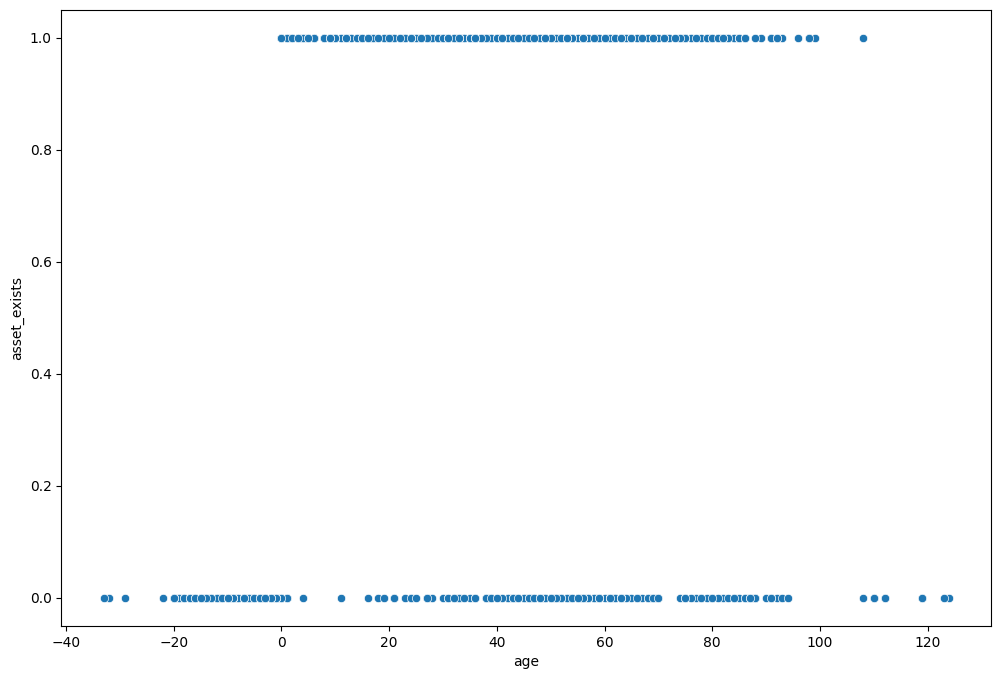

In [235]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='age', y='asset_exists')
plt.show();

I wanted to see what the range for the negative ages were since there are a decent amount of negative ages. The possibility of ages to be negative is from the replacement of the pipes since their last break. For instance, the one pipe had a break in 2001 but was replaced in 2006 so it has an age of -5.

Technically what I could do is remove all instances where the asset does not exist since we're only insterested in predicting the failure of an existing pipe.

In [236]:
data.roadsegmentid.value_counts()

11697    15
11696    13
13222    12
12610    11
12659    11
         ..
6722      1
9827      1
8787      1
9222      1
9949      1
Name: roadsegmentid, Length: 1125, dtype: int64

In [237]:
data['roadsegmentid'].value_counts().describe()

count    1125.000000
mean        2.297778
std         1.919474
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: roadsegmentid, dtype: float64

In [238]:
data['incident_date'] = pd.to_datetime(data['incident_date'])

In [239]:
data['asset_year_installed'] = pd.to_datetime(data['asset_year_installed'])

In [240]:
data['incident_date'].dt.year.value_counts()

2003    138
2011    135
2015    131
2014    131
2010    125
2000    119
2007    116
1999    116
2002    114
2013    102
2001    100
1998     99
2005     99
1997     94
2022     93
2009     92
2018     89
2004     88
2019     87
2006     82
2021     79
2017     77
2008     76
2020     71
2016     68
2012     54
1985      3
1987      2
1986      1
1995      1
1991      1
1992      1
1996      1
Name: incident_date, dtype: int64

In [241]:
data['asset_exists'].value_counts()

1    2042
0     543
Name: asset_exists, dtype: int64

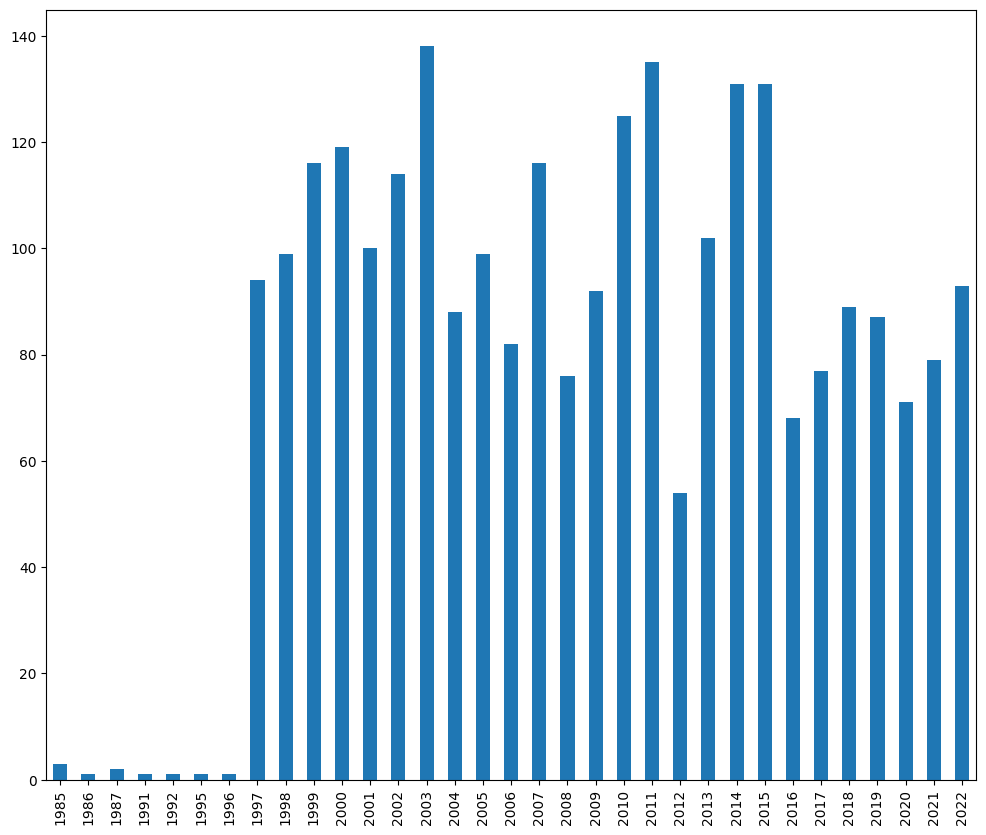

In [242]:
plt.figure(figsize=(12, 10))
data['incident_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.show();

In [243]:
breaks_per_year = pd.Series(data['incident_date'].dt.year.value_counts().sort_index())
breaks_per_year.index

Int64Index([1985, 1986, 1987, 1991, 1992, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64')

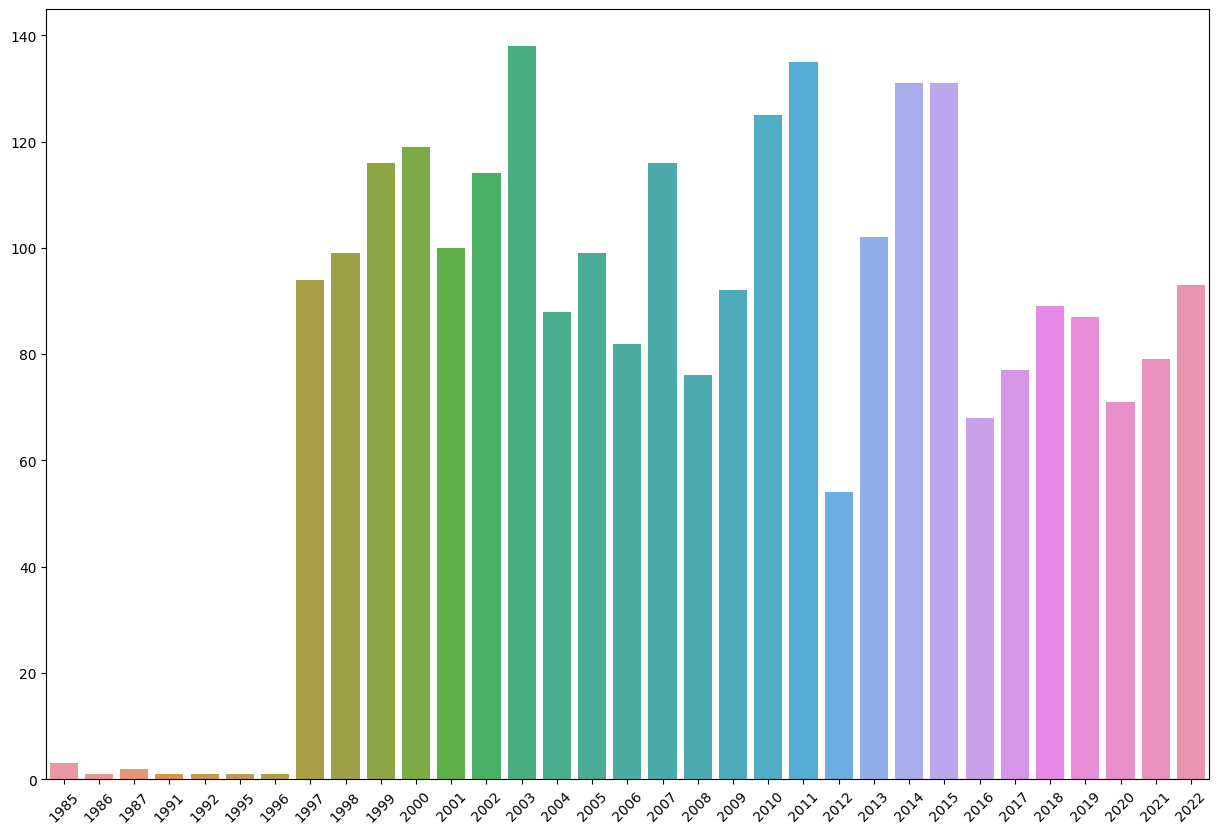

In [244]:
plt.figure(figsize=(15, 10))
sns.barplot(x=breaks_per_year.index, y=breaks_per_year.values)
plt.xticks(rotation=45)
plt.show();

Let's drop observations where the asset doesn't exist.

In [245]:
# shape before dropping
print(data.shape)
data = data[data['asset_exists'] == 1]
# shape after dropping
print(data.shape)

(2585, 24)
(2042, 24)


In [246]:
data.head()

,longitude,latitude,objectid,watbreakincidentid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists
0,-80.484005,43.462939,1,2252,2017-12-01,MAIN,CORROSION,AGE,CATEGORY 2,6961,LANCASTER ST W,134292,450.0,1937-01-01,CI,1,80,0,0,0,0,1,1,1
1,-80.515075,43.422742,7874,1311,2001-03-26,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6116,CLOVERDALE CRES,4101323,13.0,1965-01-01,XXX,1,36,1,1,1,1,1,1,1
2,-80.439811,43.445067,7875,1325,2006-09-06,SERVICE,UNKNOWN,OTHER,CATEGORY 1,13207,WREN CRES,4099987,25.0,1967-01-01,XXX,1,39,1,1,1,1,1,1,1
3,-80.510859,43.426478,7876,1328,2006-09-11,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6498,GREENBROOK DR,4642530,25.0,1964-01-01,PVC,1,42,1,1,1,1,1,1,1
4,-80.457520,43.443201,7877,1308,2000-01-27,SERVICE,UNKNOWN,OTHER,CATEGORY 1,22846,MONTGOMERY RD,4100648,25.0,1967-01-01,XXX,1,33,1,1,1,1,1,1,1


In [247]:
# drop watbreakincidentid
data.drop('watbreakincidentid', axis=1, inplace=True)

In [248]:
data.head()

,longitude,latitude,objectid,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,street,assetid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists
0,-80.484005,43.462939,1,2017-12-01,MAIN,CORROSION,AGE,CATEGORY 2,6961,LANCASTER ST W,134292,450.0,1937-01-01,CI,1,80,0,0,0,0,1,1,1
1,-80.515075,43.422742,7874,2001-03-26,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6116,CLOVERDALE CRES,4101323,13.0,1965-01-01,XXX,1,36,1,1,1,1,1,1,1
2,-80.439811,43.445067,7875,2006-09-06,SERVICE,UNKNOWN,OTHER,CATEGORY 1,13207,WREN CRES,4099987,25.0,1967-01-01,XXX,1,39,1,1,1,1,1,1,1
3,-80.510859,43.426478,7876,2006-09-11,SERVICE,UNKNOWN,OTHER,CATEGORY 1,6498,GREENBROOK DR,4642530,25.0,1964-01-01,PVC,1,42,1,1,1,1,1,1,1
4,-80.457520,43.443201,7877,2000-01-27,SERVICE,UNKNOWN,OTHER,CATEGORY 1,22846,MONTGOMERY RD,4100648,25.0,1967-01-01,XXX,1,33,1,1,1,1,1,1,1


Let's encode our categorical variables and start to save the data as a separate set so we keep some originality for the EDA.

Categories to encode:
- `break_type`
- `break_nature`
- `break_apparent_cause`
- `break_categorization`
- `asset_material`

In [249]:
data['objectid'].nunique()

2042

In [250]:
data_copy = data.copy()
data_copy.drop(['objectid', 'street', 'assetid'], axis=1, inplace=True)

In [251]:
# make sure there aren't any negative ages anymore
data_copy['age'].describe()

count    2042.000000
mean       46.313418
std        13.930875
min         0.000000
25%        38.000000
50%        47.000000
75%        55.000000
max       108.000000
Name: age, dtype: float64

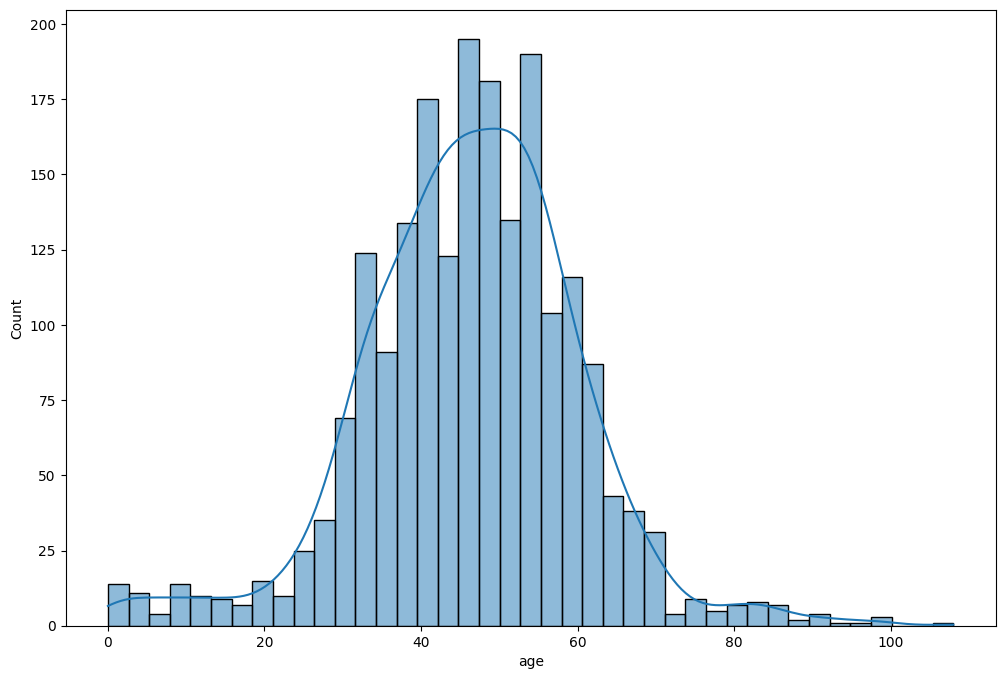

In [252]:
plt.figure(figsize=(12, 8))
sns.histplot(data_copy['age'], kde=True)
plt.show();

I'll visualize all of the unique values for each category that needs to be encoded so I know how many different values are in each column. I could get dummy variables for the categories but that would increase the feature space more than I would like. I thought about just creating a dictionary of each column with corresponding values and mapping them to the column but this could also be time consuming. Let's try and use pandas to our advantage here and convert each column to a category and call `cat.codes` on them, this is known as label encoding.

In [253]:
cat_features = data_copy[['break_type', 'break_nature', 'break_apparent_cause', 'break_categorization', 'asset_material']]

for feature in cat_features:
    print(data_copy[feature].value_counts())
    print('-'*30)

MAIN       2021
SERVICE      21
Name: break_type, dtype: int64
------------------------------
UNKNOWN            1538
CIRCUMFERENTIAL     342
CORROSION           100
FITTING/JOINT        32
LONGITUDINAL         23
WATER SERVICE         7
Name: break_nature, dtype: int64
------------------------------
OTHER             1603
AGE                182
COMBINATION        115
CORROSION          100
PRESSURE            19
SOILS               16
FAULTY INSTALL       7
Name: break_apparent_cause, dtype: int64
------------------------------
CATEGORY 1    1911
UNKNOWN        117
CATEGORY 2      14
Name: break_categorization, dtype: int64
------------------------------
CI      1418
DI       520
PVC       58
XXX       18
CPP       14
AC         8
PVCO       3
COP        2
HDPE       1
Name: asset_material, dtype: int64
------------------------------


In [254]:
for feature in data_copy[['break_type', 'break_nature', 'break_apparent_cause', 'break_categorization', 'asset_material']]:
    data_copy[feature] = data_copy[feature].astype('category')
    data_copy[feature] = data_copy[feature].cat.codes


In [255]:
data_copy.head()

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,roadsegmentid,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists
0,-80.484005,43.462939,2017-12-01,0,1,0,1,6961,450.0,1937-01-01,1,1,80,0,0,0,0,1,1,1
1,-80.515075,43.422742,2001-03-26,1,4,4,0,6116,13.0,1965-01-01,8,1,36,1,1,1,1,1,1,1
2,-80.439811,43.445067,2006-09-06,1,4,4,0,13207,25.0,1967-01-01,8,1,39,1,1,1,1,1,1,1
3,-80.510859,43.426478,2006-09-11,1,4,4,0,6498,25.0,1964-01-01,6,1,42,1,1,1,1,1,1,1
4,-80.457520,43.443201,2000-01-27,1,4,4,0,22846,25.0,1967-01-01,8,1,33,1,1,1,1,1,1,1


In [256]:
cat_features = data_copy[['break_type', 'break_nature', 'break_apparent_cause', 'break_categorization', 'asset_material']]

for feature in cat_features:
    print(data_copy[feature].value_counts())
    print('-'*30)

0    2021
1      21
Name: break_type, dtype: int64
------------------------------
4    1538
0     342
1     100
2      32
3      23
5       7
Name: break_nature, dtype: int64
------------------------------
4    1603
0     182
1     115
2     100
5      19
6      16
3       7
Name: break_apparent_cause, dtype: int64
------------------------------
0    1911
2     117
1      14
Name: break_categorization, dtype: int64
------------------------------
1    1418
4     520
6      58
8      18
3      14
0       8
7       3
2       2
5       1
Name: asset_material, dtype: int64
------------------------------


In [257]:
data_copy.drop('roadsegmentid', axis=1, inplace=True)

In [258]:
data_copy.head()

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists
0,-80.484005,43.462939,2017-12-01,0,1,0,1,450.0,1937-01-01,1,1,80,0,0,0,0,1,1,1
1,-80.515075,43.422742,2001-03-26,1,4,4,0,13.0,1965-01-01,8,1,36,1,1,1,1,1,1,1
2,-80.439811,43.445067,2006-09-06,1,4,4,0,25.0,1967-01-01,8,1,39,1,1,1,1,1,1,1
3,-80.510859,43.426478,2006-09-11,1,4,4,0,25.0,1964-01-01,6,1,42,1,1,1,1,1,1,1
4,-80.457520,43.443201,2000-01-27,1,4,4,0,25.0,1967-01-01,8,1,33,1,1,1,1,1,1,1


In [259]:
data_copy['asset_size'].value_counts()

150.0     1435
200.0      247
300.0      234
450.0       45
100.0       42
25.0        10
600.0        7
50.0         6
13.0         5
1200.0       5
250.0        3
750.0        2
0.0          1
Name: asset_size, dtype: int64

In [260]:
data_copy.rename(columns={'age': 'age_at_break'}, inplace=True)

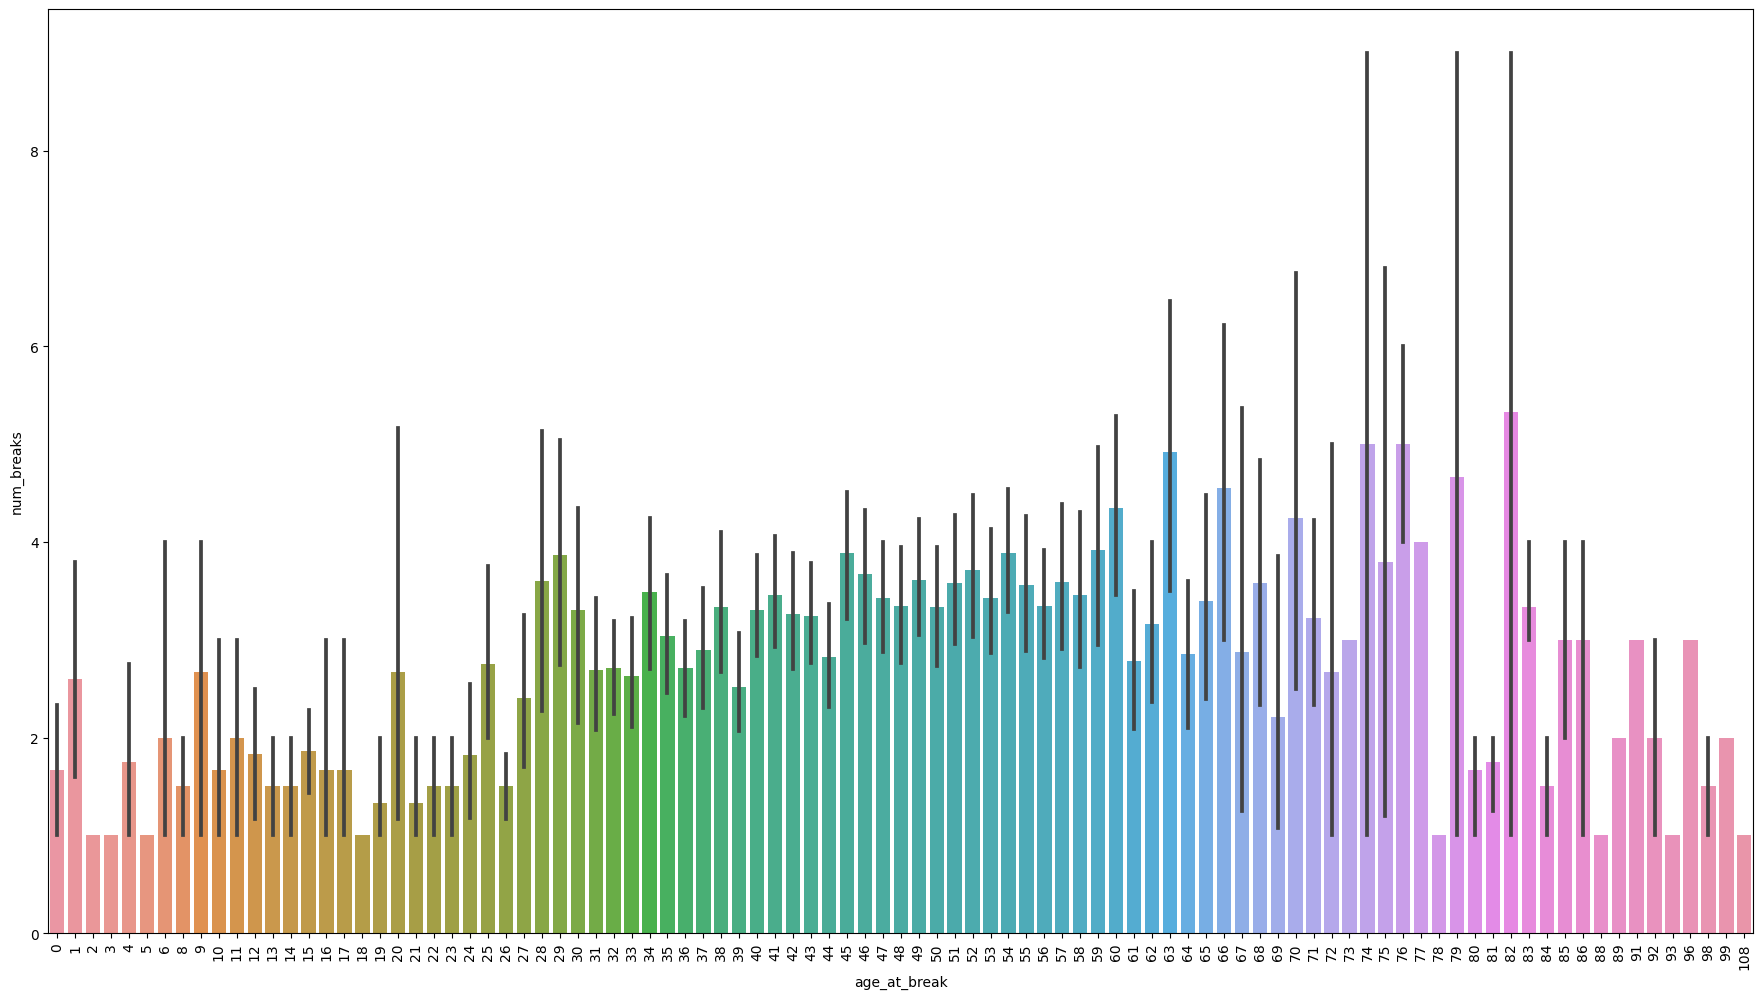

In [261]:
plt.figure(figsize=(22, 12))
sns.barplot(data=data_copy, x='age_at_break', y='num_breaks')
plt.xticks(rotation=90)
plt.show();

In [262]:
data_copy['num_breaks'].describe()

count    2042.000000
mean        3.270323
std         2.448568
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: num_breaks, dtype: float64

In [263]:
data_copy['age_at_break'].describe()

count    2042.000000
mean       46.313418
std        13.930875
min         0.000000
25%        38.000000
50%        47.000000
75%        55.000000
max       108.000000
Name: age_at_break, dtype: float64

In [264]:
max_age = data_copy['age_at_break'].max()
num_breaks_max_age = data_copy['num_breaks'].loc[data_copy['age_at_break'] == max_age]

max_age_failure_rate = num_breaks_max_age / max_age

print(max_age_failure_rate)

1229    0.009259
Name: num_breaks, dtype: float64


In [265]:
# how many values have age_at_break = 0
data_copy['age_at_break'].loc[data_copy['age_at_break'] == 0].count()

6

In [266]:
# calculate the failure rate from num_breaks and age
data_copy['failure_rate'] = round(data_copy['num_breaks'] / data_copy['age_at_break'], 2)
data_copy.sample(5)

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
142,-80.440250,43.448355,2013-01-06,0,0,2,0,150.0,1966-01-01,1,4,47,1,1,1,1,1,1,1,0.09
1381,-80.464355,43.460131,2000-02-03,0,4,4,0,150.0,1958-01-01,1,4,42,1,1,1,1,1,1,1,0.10
1620,-80.452766,43.437594,2003-02-05,0,4,4,0,150.0,1953-01-01,1,4,50,1,1,1,1,1,1,1,0.08
1387,-80.449450,43.450244,1999-01-16,0,4,4,0,150.0,1960-01-01,1,1,39,1,1,1,1,1,1,1,0.03
1033,-80.519174,43.423824,2016-02-17,0,4,4,0,150.0,1962-01-01,1,7,54,1,1,1,1,1,1,1,0.13


In [267]:
data_copy['age_at_break'].describe()

count    2042.000000
mean       46.313418
std        13.930875
min         0.000000
25%        38.000000
50%        47.000000
75%        55.000000
max       108.000000
Name: age_at_break, dtype: float64

In [268]:
data_copy['failure_rate'].describe()

count    2042.00
mean         inf
std          NaN
min         0.01
25%         0.03
50%         0.06
75%         0.10
max          inf
Name: failure_rate, dtype: float64

In [269]:
# display failure rates that are inf
data_copy['failure_rate'].loc[data_copy['failure_rate'] == np.inf]

643     inf
1144    inf
1300    inf
1383    inf
1439    inf
1774    inf
Name: failure_rate, dtype: float64

In [270]:
# print failure rates that are inf
infinity_failure_rates = data_copy[data_copy['failure_rate']== np.inf]
infinity_failure_rates

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
643,-80.492340,43.445806,2011-12-15,0,4,4,0,150.0,2011-01-01,6,1,0,1,1,1,1,1,1,1,inf
1144,-80.484931,43.456100,2001-07-03,0,4,4,0,50.0,2001-01-01,6,3,0,1,1,1,1,1,1,1,inf
1300,-80.438473,43.406985,2000-12-11,0,4,4,0,50.0,2000-01-01,6,1,0,1,1,1,1,1,1,1,inf
1383,-80.484936,43.456094,2001-07-06,0,4,4,0,50.0,2001-01-01,6,3,0,1,1,1,1,1,1,1,inf
1439,-80.490677,43.444917,2011-12-15,0,4,4,0,150.0,2011-01-01,6,1,0,1,1,1,1,1,1,1,inf
1774,-80.508320,43.440505,2017-07-24,0,4,4,0,150.0,2017-01-01,7,1,0,1,1,1,1,1,0,1,inf


Manually calculating the age for the dates above that are `inf` values. The age will be represented as a decimal number representing days. For example, the top row where date of incident is 2011-12-15 and asset year installed is 2011-01-01 would have an age of 0.348 = 348 days old.

- index 643 = 0.348
- index 1144 = 0.183
- index 1300 = 0.345
- index 1383 = 0.186
- index 1439 = 0.348
- index 1774 = 0.204

In [271]:
# data_copy['failure_rate'].loc[data_copy['failure_rate'] == np.inf] = 0

In [272]:
data_copy.loc[data_copy['failure_rate'] == np.inf]

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
643,-80.492340,43.445806,2011-12-15,0,4,4,0,150.0,2011-01-01,6,1,0,1,1,1,1,1,1,1,inf
1144,-80.484931,43.456100,2001-07-03,0,4,4,0,50.0,2001-01-01,6,3,0,1,1,1,1,1,1,1,inf
1300,-80.438473,43.406985,2000-12-11,0,4,4,0,50.0,2000-01-01,6,1,0,1,1,1,1,1,1,1,inf
1383,-80.484936,43.456094,2001-07-06,0,4,4,0,50.0,2001-01-01,6,3,0,1,1,1,1,1,1,1,inf
1439,-80.490677,43.444917,2011-12-15,0,4,4,0,150.0,2011-01-01,6,1,0,1,1,1,1,1,1,1,inf
1774,-80.508320,43.440505,2017-07-24,0,4,4,0,150.0,2017-01-01,7,1,0,1,1,1,1,1,0,1,inf


In [273]:
data_copy.describe()

,longitude,latitude,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
count,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.0,2042.00
mean,-80.477427,43.441330,0.010284,3.143976,3.398139,0.121450,182.353085,1.989226,3.270323,46.313418,0.998041,0.998041,0.991675,0.992165,0.994123,0.984819,1.0,inf
std,0.032828,0.017585,0.100912,1.570438,1.345927,0.470533,88.297880,1.596751,2.448568,13.930875,0.044227,0.044227,0.090884,0.088192,0.076452,0.122303,0.0,NaN
min,-80.556706,43.380008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.01
25%,-80.507994,43.428257,0.000000,4.000000,4.000000,0.000000,150.000000,1.000000,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.03
50%,-80.469590,43.441195,0.000000,4.000000,4.000000,0.000000,150.000000,1.000000,3.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.06
75%,-80.450340,43.453818,0.000000,4.000000,4.000000,0.000000,200.000000,4.000000,4.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.10
max,-80.394212,43.484660,1.000000,5.000000,6.000000,2.000000,1200.000000,8.000000,12.000000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,inf


In [274]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2584
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   longitude                    2042 non-null   float64       
 1   latitude                     2042 non-null   float64       
 2   incident_date                2042 non-null   datetime64[ns]
 3   break_type                   2042 non-null   int8          
 4   break_nature                 2042 non-null   int8          
 5   break_apparent_cause         2042 non-null   int8          
 6   break_categorization         2042 non-null   int8          
 7   asset_size                   2042 non-null   float64       
 8   asset_year_installed         2042 non-null   datetime64[ns]
 9   asset_material               2042 non-null   int8          
 10  num_breaks                   2042 non-null   int64         
 11  age_at_break                 2042 non-null 

Now that that's fixed, I'm going to recalculate the failure rates to see if the `np.inf` values have been talen care of.

In [275]:
data_copy['failure_rate'] = round(data_copy['num_breaks'] / data_copy['age_at_break'], 4)

In [276]:
data_copy.describe()

,longitude,latitude,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
count,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.0,2042.0000
mean,-80.477427,43.441330,0.010284,3.143976,3.398139,0.121450,182.353085,1.989226,3.270323,46.313418,0.998041,0.998041,0.991675,0.992165,0.994123,0.984819,1.0,inf
std,0.032828,0.017585,0.100912,1.570438,1.345927,0.470533,88.297880,1.596751,2.448568,13.930875,0.044227,0.044227,0.090884,0.088192,0.076452,0.122303,0.0,NaN
min,-80.556706,43.380008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0093
25%,-80.507994,43.428257,0.000000,4.000000,4.000000,0.000000,150.000000,1.000000,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0312
50%,-80.469590,43.441195,0.000000,4.000000,4.000000,0.000000,150.000000,1.000000,3.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0588
75%,-80.450340,43.453818,0.000000,4.000000,4.000000,0.000000,200.000000,4.000000,4.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.1000
max,-80.394212,43.484660,1.000000,5.000000,6.000000,2.000000,1200.000000,8.000000,12.000000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,inf


In [277]:
data_copy.head()

,longitude,latitude,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,asset_size,asset_year_installed,asset_material,num_breaks,age_at_break,positive_pressure_maintaned,air_gap_maintaned,mechanical_removal,flushing_excavation,higher_velocity_flushing,anode_installed,asset_exists,failure_rate
0,-80.484005,43.462939,2017-12-01,0,1,0,1,450.0,1937-01-01,1,1,80,0,0,0,0,1,1,1,0.0125
1,-80.515075,43.422742,2001-03-26,1,4,4,0,13.0,1965-01-01,8,1,36,1,1,1,1,1,1,1,0.0278
2,-80.439811,43.445067,2006-09-06,1,4,4,0,25.0,1967-01-01,8,1,39,1,1,1,1,1,1,1,0.0256
3,-80.510859,43.426478,2006-09-11,1,4,4,0,25.0,1964-01-01,6,1,42,1,1,1,1,1,1,1,0.0238
4,-80.457520,43.443201,2000-01-27,1,4,4,0,25.0,1967-01-01,8,1,33,1,1,1,1,1,1,1,0.0303


In [278]:
model_data = data_copy.copy()
model_data.drop(['longitude', 'latitude', 'incident_date', 'asset_year_installed'], axis=1, inplace=True)
model_data.to_csv('../data/processed/model_data.csv', index=False)

In [279]:
# data_copy.to_csv('../data/processed/final_data.csv', index=False)